<a href="https://colab.research.google.com/github/gabrield03/Job-Posting-Analysis-and-Visualization/blob/main/DataProcessing/CommonWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Edited by: Gabriel Larot

Last Updated: Feb 20, 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_csv = 'https://raw.githubusercontent.com/gabrield03/Job-Posting-Analysis-and-Visualization/main/Datasets/DataScientist.csv'

jobs_df = pd.read_csv(
  url_csv,
  na_values=['-', -1]
)
jobs_df.head()

In [ ]:
jobs_df.info()

In [ ]:
# clean up columns - Deal with Job description later
jobs_clean_df = jobs_df
jobs_clean_df.replace({'Salary Estimate': r'\(.*\)'}, '', regex=True, inplace=True)
jobs_clean_df.replace({'Company Name': r'\n.*'}, '', regex=True, inplace=True)
#jobs_clean_df.drop(['Unnamed: 0', 'index', 'Job Description'], axis=1, inplace=True)
jobs_clean_df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)


jobs_clean_df

## Focus on 'Job Description'

In [ ]:
# Clean Job Description

desc_df= jobs_clean_df.replace({'Job Description': r'(\n)+'}, ' ', regex=True)
desc_df

In [ ]:
desc_df['Job Description'].head()

In [22]:
word_count_dict = {}

for row in desc_df['Job Description']:

  for word in row.split():
    if word not in word_count_dict:
      word_count_dict[word] = 1
    else:
      word_count_dict[word] += 1
      #print(word)

#len(word_count_dict)

word_count_dict = dict(sorted(word_count_dict.items(), key=lambda x:x[1], reverse=True))
word_count_dict
len(word_count_dict)

72982

In [33]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

# define my own stop words
my_stop_words = {'•', '·', 'one', 'use', '&', '-', 'using', 'including', 'must', 'company', 'across', 'and/or', 'work', 'years', 'ability', 'experience'}
stop_words.update(my_stop_words)

word_count_dict = Counter()

for row in desc_df['Job Description']:
    words = [word.lower() for word in row.split() if word.lower() not in stop_words]
    word_count_dict.update(words)

# Get the top 20 words
top_words = word_count_dict.most_common(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('data', 33037), ('business', 8883), ('team', 5905), ('skills', 4784), ('development', 4493), ('knowledge', 4377), ('working', 4320), ('strong', 4129), ('new', 4125), ('job', 4020), ('technical', 3944), ('support', 3718), ('analytics', 3558), ('research', 3535), ('science', 3535), ('analysis', 3520), ('learning', 3319), ('solutions', 3304), ('related', 3286), ('develop', 3272), ('machine', 3198), ('information', 3127), ('management', 2960), ('degree', 2953), ('required', 2897), ('provide', 2706), ('tools', 2637), ('product', 2616), ('computer', 2607), ('opportunity', 2508), ('technology', 2504), ('design', 2485), ('software', 2474), ('statistical', 2465), ('complex', 2450), ('position', 2347), ('help', 2339), ('requirements', 2339), ('systems', 2302), ('build', 2279), ('models', 2242), ('employment', 2236), ('analytical', 2192), ('teams', 2182), ('scientist', 2158), ('engineering', 2153), ('project', 2099), ('services', 2083), ('within', 2074), ('role', 2071)]


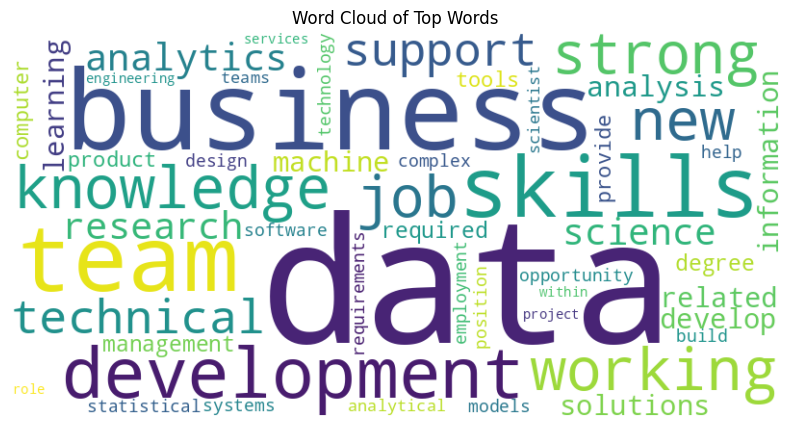

In [35]:
from wordcloud import WordCloud

top_words_df = pd.DataFrame(top_words, columns=['Words', 'Count'])

cloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(dict(zip(top_words_df['Words'], top_words_df['Count'])))
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words')
plt.show()